In [87]:
# linear algebra
import numpy as np

# data processing
import pandas as pd

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier


In [88]:
#from google.colab import drive
#drive.mount('/content/drive')

In [89]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline

In [90]:
dataset = pd.read_csv("/content/adult.csv")
dataset.shape

(48842, 15)

In [91]:
dataset.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# **Data Preprocessing**

In [92]:
dataset['income']=dataset['income'].map({'<=50K': 0, '>50K': 1})


In [93]:
dataset['occupation'] = dataset['occupation'].fillna('Prof-specialty')

In [94]:
dataset['workclass'].describe()


,workclass
count,48842
unique,9
top,Private
freq,33906


In [95]:
dataset['workclass'] = dataset['workclass'].fillna('Private')

In [96]:
dataset['native-country'].describe()

,native-country
count,48842
unique,42
top,United-States
freq,43832


In [97]:
dataset['native-country'] = dataset['native-country'].fillna('United-States')

In [98]:

dataset.describe(include=["O"])

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
count,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,33906,15784,22379,6172,19716,41762,32650,43832


In [99]:
dataset.drop(['fnlwgt'], axis = 1, inplace = True)

In [100]:
Dataset = dataset.copy()

In [101]:
Dataset = Dataset.replace('?',np.nan )

In [102]:
X = dataset.drop(['income'], axis=1)
Y = dataset['income']

In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [104]:
from sklearn import preprocessing

categorical = ['workclass','education', 'marital-status', 'occupation', 'relationship','race', 'gender','native-country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

In [105]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

# **Applying Decision Tree Classification**

In [106]:
#Applying the Decision Tree algorithm

decision_tree = DecisionTreeClassifier(criterion = "gini", splitter="best", max_depth=20)
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(acc_decision_tree)

93.19


In [107]:
decision_tree = DecisionTreeClassifier(criterion = "gini", splitter="best", max_depth=40)
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(acc_decision_tree)

97.6


In [108]:
X = dataset.drop(['income'], axis=1)
Y = dataset['income']

In [109]:
x = X
y = Y

categorical = ['workclass','education', 'marital-status', 'occupation', 'relationship','race', 'gender','native-country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        x[feature] = le.fit_transform(x[feature])

x

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,4,1,7,4,7,3,2,1,0,0,40,39
1,38,4,11,9,2,5,0,4,1,0,0,50,39
2,28,2,7,12,2,11,0,4,1,0,0,40,39
3,44,4,15,10,2,7,0,2,1,7688,0,40,39
4,18,0,15,10,4,0,3,4,0,0,0,30,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,4,7,12,2,13,5,4,0,0,0,38,39
48838,40,4,11,9,2,7,0,4,1,0,0,40,39
48839,58,4,11,9,6,1,4,4,0,0,0,40,39
48840,22,4,11,9,4,1,3,4,1,0,0,20,39


In [110]:
xdf = pd.DataFrame(scaler.fit_transform(x), columns = X.columns)
xdf

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,-0.995129,0.088484,-2.397350,-1.197259,0.916138,0.099824,0.971649,-1.971746,0.70422,-0.144804,-0.217127,-0.034087,0.289462
1,-0.046942,0.088484,0.183660,-0.419335,-0.410397,-0.372938,-0.900852,0.392384,0.70422,-0.144804,-0.217127,0.772930,0.289462
2,-0.776316,-1.277432,-0.848744,0.747550,-0.410397,1.045346,-0.900852,0.392384,0.70422,-0.144804,-0.217127,-0.034087,0.289462
3,0.390683,0.088484,1.216063,-0.030373,-0.410397,0.099824,-0.900852,-1.971746,0.70422,0.886874,-0.217127,-0.034087,0.289462
4,-1.505691,-2.643348,1.216063,-0.030373,0.916138,-1.554840,0.971649,0.392384,-1.42001,-0.144804,-0.217127,-0.841104,0.289462
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,-0.849254,0.088484,-0.848744,0.747550,-0.410397,1.518107,2.219984,0.392384,-1.42001,-0.144804,-0.217127,-0.195490,0.289462
48838,0.098933,0.088484,0.183660,-0.419335,-0.410397,0.099824,-0.900852,0.392384,0.70422,-0.144804,-0.217127,-0.034087,0.289462
48839,1.411808,0.088484,0.183660,-0.419335,2.242673,-1.318460,1.595817,0.392384,-1.42001,-0.144804,-0.217127,-0.034087,0.289462
48840,-1.213941,0.088484,0.183660,-0.419335,0.916138,-1.318460,0.971649,0.392384,0.70422,-0.144804,-0.217127,-1.648120,0.289462


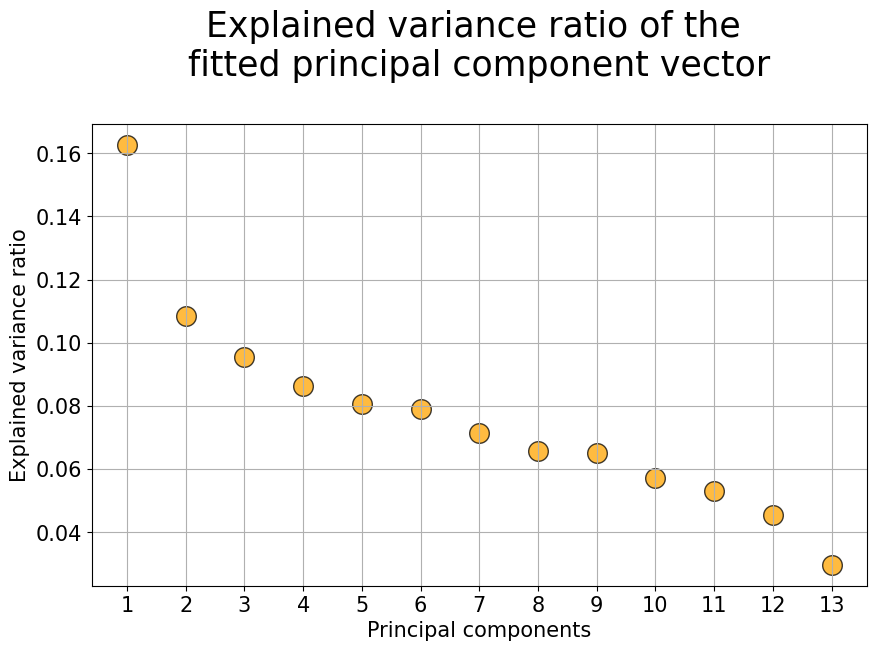

In [111]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
dfx_pca = pca.fit(xdf)

plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()